# Californians and their support to the death penalty

Suppose our prior idstribution for $\theta$, the proportion of Californians who support the death penalty, is beta with mean 0.6 and standard devation 0.3.

## (a)

_Determine the parameters a and b of our prior distribution._

To determine a and b we can solve an equation with two unknowns:

\begin{align*}
\begin{matrix}
E(\theta) = \frac{a}{a+b} && \\
0.6 = \frac{a}{a+b} && \\
a = \frac64 b && SD(\theta) = \sqrt{\frac{E(\theta))(1-E(\theta))}{a + b + 1}} \\
&& 0.09 = \frac{0.6(1-0.6)}{a + b + 1} \\
&& 0.09 = \frac{6/25}{(10/4)b + 1} \\
&& \frac{9}{40}b + 0.09 = \frac{6}{25} \\
&& \frac{9}{40}b = \frac{3}{20} \\
&& b = \frac23 \\
a = \frac32 \cdot \frac23 &&  \\
a = 1 && b=\frac23
\end{matrix}
\end{align*}

Thus our prior is: 

$$p(\theta) = Beta(1, 2/3)$$

Now, we can sketch the prior density function:

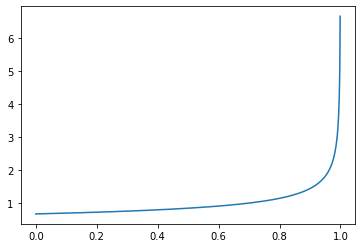

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

theta = np.arange(0, 1.001, 10**-3)
a, b = 1, 2/3
dens = stats.beta.pdf(theta, a,b)
plt.plot(theta, dens)
plt.show()

## (b)

_Now we have a random sample of 1000 Californians, and 65% support the death penalty. What are our posterior mean and variance for $\theta$? Draw the posterior density function._

To be able to create a posterior, we need a likelihood function. Since this is a binary problem (only two outcomes/possiblities) we can use a binomial as our likelihood. We can now calculate the posterior distribution:

\begin{align*}
\pi(\theta|data) &= \frac1c \cdot \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1} (1-\theta)^{b-1} \cdot \binom{n}{y} \theta^y (1-\theta)^{n-y} \\
&\propto \theta^{a+y-1} (1-\theta)^{b+n-y-1}
\end{align*}

which resembles a beta distribution. Thus our posteiror distribution is 

$$\theta|data \sim Beta(a+y, b+n-y)$$

where 

* $y$: number of Californians that said they support death penalty
* $n$: number of Californians that where asked

Now, we can draw from the posterior distribution:

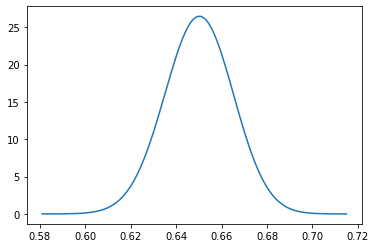

In [3]:
theta = np.arange(0, 1.001, 10**-3)
a, b = 1, 2/3

n = 1000
y = 0.65*n

a_new, b_new = a + y, b+n-y
dens = stats.beta.pdf(theta, a_new,b_new)
cond = dens > 0.001  # to get a narrower plot
plt.plot(theta[cond], dens[cond])
plt.show()

In [6]:
# posterior mean and variance for \theta

mean_post = stats.beta.mean(a_new, b_new)
var_post = stats.beta.var(a_new, b_new)
print(f"Posterior\nMean: {round(mean_post, 4)}, var: {round(var_post, 4)}")

Posterior
Mean: 0.6499, var: 0.0002


## (c)

_Examine the sensitivity of the posterior distribution to different prior means and widths including a non-informative prior_

Can use Jeffreys prior:

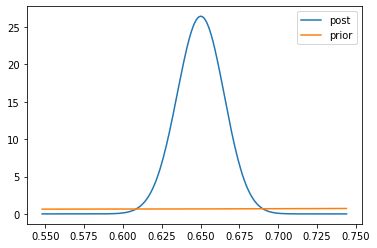

In [7]:
n = 1000
y = 0.65 * 1000

# standard Jeffery non informative prior
a = 1/2  
b = 1/2 

a_1 = a + y
b_1 = b + n - y 

theta = np.arange(0, 1.0001, 0.001)
dens = stats.beta.pdf(theta, a_1, b_1)
dens_prior = stats.beta.pdf(theta, a, b)

cond = dens > 0.00000001  # just to get a narrower plot ut 

plt.plot(theta[cond], dens[cond], label="post")
plt.plot(theta[cond], dens_prior[cond], label="prior")
plt.legend()
plt.show()